<a href="https://colab.research.google.com/github/Cottracker/Scraping-Hotel-Traveloka/blob/main/scraping_traveloka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# : lakukan ekstrak data dan masukan kedalam dataframe

import requests
import pandas as pd
from bs4 import BeautifulSoup


pd.set_option('display.max_columns', None)

extracted_data_all_pages = []

for page_number in range(1, 400):  # Loop through pages 1 to 5
    url = f'https://www.traveloka.com/en-id/hotel/indonesia/region/bali-102746?page={page_number}'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    containers = soup.findAll("div", {"class": "css-1dbjc4n r-1habvwh r-1kbdv8c r-18u37iz r-1wtj0ep"})

    extracted_data_page = []
    for container in containers:
        h = container.text
        lines = [line.strip() for line in h.split('\n') if line.strip()]
        extracted_data_page.append(lines)

    extracted_data_all_pages.extend(extracted_data_page)

# Create a DataFrame
df = pd.DataFrame(extracted_data_all_pages)
df


,0
0,Wyndham Garden Kuta Beach Bali 8.2 (1.620)Conv...
1,The Apurva Kempinski Bali 9 (1.603)Impressive
2,Brits Hotel Legian 8.7 (2.651)Impressive
3,Primera Hotel Seminyak 8.4 (1.331)Impressive
4,Harper Kuta by ASTON 8.7 (3.193)Impressive
...,...
7975,The Anvaya Beach Resort Bali 9 (3.025)Impressive
7976,BEST WESTERN Kuta Villa 8.2 (4.717)Convenient
7977,Aston Denpasar Hotel & Convention Center 8.5 (...
7978,Mega Boutique Hotel & Spa 8.5 (6.561)Impressive


In [ ]:
# : Using dataframe df: ekstrak hotel name, rating

# Extract hotel name and rating from the '0' column.
# The provided dataframe information suggests the hotel name and rating are combined in the '0' column.
# This code assumes a specific pattern within the strings in the '0' column.

import pandas as pd

def extract_hotel_info(df):
    """
    Extracts hotel name and rating from a combined string column.

    Args:
    df: pandas DataFrame containing a column '0' with combined hotel info.

    Returns:
    pandas DataFrame with added 'extracted_hotel_name' and 'extracted_rating' columns
    """

    # Create new columns for extracted information.
    df['extracted_hotel_name'] = ''
    df['extracted_rating'] = ''

    for index, row in df.iterrows():
        text = row[0]
        try:
          parts = text.split()
          hotel_name = ' '.join(parts[:parts.index(next(x for x in parts if x.replace('.','').replace('(','').isdigit()))]) # Extract hotel name up to the first rating digit
          df.loc[index,'extracted_hotel_name'] = hotel_name

          rating_start = text.find(next(x for x in parts if x.replace('.','').replace('(','').isdigit()))  # Find the beginning of the rating
          rating_end = text.find(')',rating_start) # Find the end of the rating
          rating = text[rating_start: rating_end+1] # Extract rating
          df.loc[index,'extracted_rating'] = rating
        except:
          pass  # Handle potential errors if the text doesn't match the expected pattern.

    return df

# Example usage:
df = extract_hotel_info(df)

df


,0,extracted_hotel_name,extracted_rating
0,Wyndham Garden Kuta Beach Bali 8.2 (1.620)Conv...,Wyndham Garden Kuta Beach Bali,8.2 (1.620)
1,The Apurva Kempinski Bali 9 (1.603)Impressive,The Apurva Kempinski Bali,9 (1.603)
2,Brits Hotel Legian 8.7 (2.651)Impressive,Brits Hotel Legian,8.7 (2.651)
3,Primera Hotel Seminyak 8.4 (1.331)Impressive,Primera Hotel Seminyak,8.4 (1.331)
4,Harper Kuta by ASTON 8.7 (3.193)Impressive,Harper Kuta by ASTON,8.7 (3.193)
...,...,...,...
7975,The Anvaya Beach Resort Bali 9 (3.025)Impressive,The Anvaya Beach Resort Bali,9 (3.025)
7976,BEST WESTERN Kuta Villa 8.2 (4.717)Convenient,BEST WESTERN Kuta Villa,8.2 (4.717)
7977,Aston Denpasar Hotel & Convention Center 8.5 (...,Aston Denpasar Hotel & Convention Center,8.5 (3.041)
7978,Mega Boutique Hotel & Spa 8.5 (6.561)Impressive,Mega Boutique Hotel & Spa,8.5 (6.561)


In [ ]:
# : Using dataframe df: pisahkan rating

import pandas as pd

# Assuming your dataframe is named 'df'

# Create new columns for rating and review count
df[['rating', 'review_count']] = df['extracted_rating'].str.extract(r'(\d\.?\d*) \(([\d.]+)\)')

# Convert rating to numeric
df['rating'] = pd.to_numeric(df['rating'])

# Convert review count to numeric
df['review_count'] = pd.to_numeric(df['review_count'])

# Extract the relevant words from the first column
df['features'] = df[0].str.extract(r'(Impressive|Superb|Convenient)')


In [ ]:

# Rename the column 'extracted_hotel_name' to 'asa'
df = df.rename(columns={'extracted_hotel_name': 'Nama Hotel'})
df


,0,Nama Hotel,extracted_rating,rating,review_count,features
0,Wyndham Garden Kuta Beach Bali 8.2 (1.620)Conv...,Wyndham Garden Kuta Beach Bali,8.2 (1.620),8.2,1.620,Convenient
1,The Apurva Kempinski Bali 9 (1.603)Impressive,The Apurva Kempinski Bali,9 (1.603),9.0,1.603,Impressive
2,Brits Hotel Legian 8.7 (2.651)Impressive,Brits Hotel Legian,8.7 (2.651),8.7,2.651,Impressive
3,Primera Hotel Seminyak 8.4 (1.331)Impressive,Primera Hotel Seminyak,8.4 (1.331),8.4,1.331,Impressive
4,Harper Kuta by ASTON 8.7 (3.193)Impressive,Harper Kuta by ASTON,8.7 (3.193),8.7,3.193,Impressive
...,...,...,...,...,...,...
7975,The Anvaya Beach Resort Bali 9 (3.025)Impressive,The Anvaya Beach Resort Bali,9 (3.025),9.0,3.025,Impressive
7976,BEST WESTERN Kuta Villa 8.2 (4.717)Convenient,BEST WESTERN Kuta Villa,8.2 (4.717),8.2,4.717,Convenient
7977,Aston Denpasar Hotel & Convention Center 8.5 (...,Aston Denpasar Hotel & Convention Center,8.5 (3.041),8.5,3.041,Impressive
7978,Mega Boutique Hotel & Spa 8.5 (6.561)Impressive,Mega Boutique Hotel & Spa,8.5 (6.561),8.5,6.561,Impressive


In [ ]:
df = df.drop('extracted_rating', axis=1)
del df[0]
# Display the modified dataframe to verify
df


,Nama Hotel,rating,review_count,features
0,Wyndham Garden Kuta Beach Bali,8.2,1.620,Convenient
1,The Apurva Kempinski Bali,9.0,1.603,Impressive
2,Brits Hotel Legian,8.7,2.651,Impressive
3,Primera Hotel Seminyak,8.4,1.331,Impressive
4,Harper Kuta by ASTON,8.7,3.193,Impressive
...,...,...,...,...
7975,The Anvaya Beach Resort Bali,9.0,3.025,Impressive
7976,BEST WESTERN Kuta Villa,8.2,4.717,Convenient
7977,Aston Denpasar Hotel & Convention Center,8.5,3.041,Impressive
7978,Mega Boutique Hotel & Spa,8.5,6.561,Impressive


In [ ]:

df['review_count'] = pd.to_numeric(df['review_count'].astype(str).str.replace(r'[,.]', '', regex=True))


In [ ]:
df

,Nama Hotel,rating,review_count,features
0,Wyndham Garden Kuta Beach Bali,8.2,162,Convenient
1,The Apurva Kempinski Bali,9.0,1603,Impressive
2,Brits Hotel Legian,8.7,2651,Impressive
3,Primera Hotel Seminyak,8.4,1331,Impressive
4,Harper Kuta by ASTON,8.7,3193,Impressive
...,...,...,...,...
7975,The Anvaya Beach Resort Bali,9.0,3025,Impressive
7976,BEST WESTERN Kuta Villa,8.2,4717,Convenient
7977,Aston Denpasar Hotel & Convention Center,8.5,3041,Impressive
7978,Mega Boutique Hotel & Spa,8.5,6561,Impressive


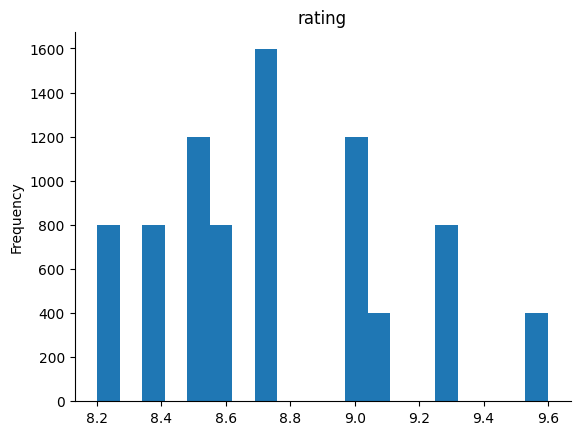

In [ ]:
from matplotlib import pyplot as plt
df['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Export the DataFrame to an Excel file
df.to_excel("hotel_bali_traveloka.xlsx", index=False)  # index=False prevents row numbers from being written to the file

